In [8]:
import numpy as np
import pandas as pd
import networkx as nx
# https://networkx.org/documentation/stable/reference/algorithms/centrality.html
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

int_exposures = pd.read_csv('Assignment-data\\interbankExposures.csv', header = None)
print((int_exposures.values < 0).sum())
G = nx.DiGraph(int_exposures)


0


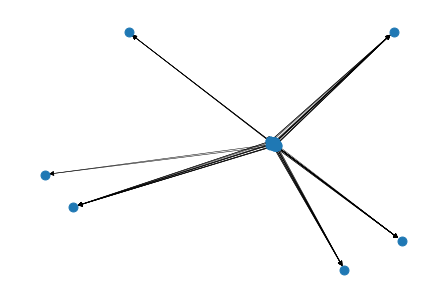

In [9]:
# Graph Topology
nx.draw(G, node_size = 80, width = 0.5)
plt.show()

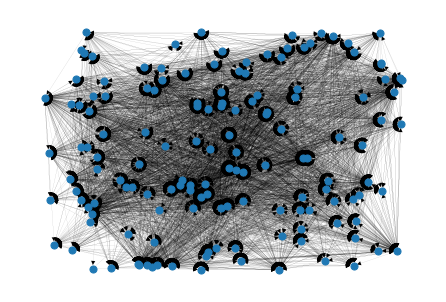

In [10]:
# Graph Topology with Random Layout
pos = nx.random_layout(G)
nx.draw(G, pos = pos, node_size = 50, width = 0.05)
plt.show()

Degree Distribution

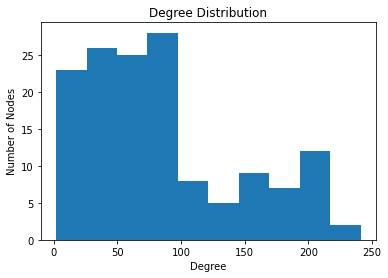

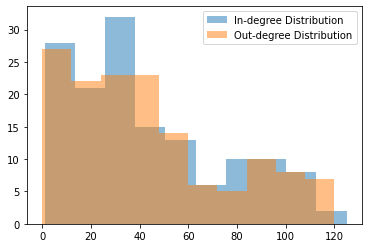

In [11]:
# Degree Distribution
degree = [G.degree(n) for n in G.nodes()]
plt.hist(degree)
plt.title('Degree Distribution')
plt.xlabel("Degree")
plt.ylabel('Number of Nodes')
plt.show()

in_degree = [G.in_degree(n) for n in G.nodes()]
out_degree = [G.out_degree(n) for n in G.nodes()]

plt.hist(list(in_degree), alpha=0.5, label='In-degree Distribution')
plt.hist(list(out_degree), alpha=0.5, label='Out-degree Distribution')
plt.legend(loc='upper right')
plt.show()


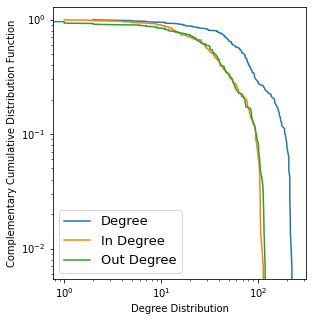

In [12]:
# In and Out Degree Distribution CCDF Log Plot
# sort the data:
degree_sorted = np.sort(degree)
in_degree_sorted = np.sort(in_degree)
out_degree_sorted = np.sort(out_degree)

# calculate the proportional values of samples
p = 1. * np.arange(len(degree)) / (len(degree) - 1)

# plot the sorted data:
fig = plt.figure(figsize = [10, 5])
ax1 = fig.add_subplot(121)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(degree_sorted, 1 - p, label = 'Degree')
ax1.plot(in_degree_sorted, 1 - p, label = 'In Degree')
ax1.plot(out_degree_sorted, 1 - p, label = 'Out Degree')
ax1.set_xlabel('Degree Distribution')
ax1.set_ylabel('Complementary Cumulative Distribution Function')
ax1.legend(loc = 'lower left', fontsize = 13)


In [13]:
# Summary Statistics for Degree
# print_summary_stats(degree, 'Degree')
# print_summary_stats(in_degree, 'In Degree')
# print_summary_stats(out_degree, 'Out Degree')

NameError: name 'print_summary_stats' is not defined

Centrality

{0: 0.1111111111111111, 1: 0.006944444444444444, 2: 0.027777777777777776, 3: 0.6805555555555555, 4: 0.09027777777777778, 5: 0.19444444444444442, 6: 0.5347222222222222, 7: 0.7013888888888888, 8: 0.15277777777777776, 9: 0.13194444444444445, 10: 0.13194444444444445, 11: 0.09722222222222221, 12: 0.1875, 13: 0.5555555555555556, 14: 0.19444444444444442, 15: 0.18055555555555555, 16: 0.013888888888888888, 17: 0.2361111111111111, 18: 0.2777777777777778, 19: 0.09027777777777778, 20: 0.5416666666666666, 21: 0.35416666666666663, 22: 0.1388888888888889, 23: 0.013888888888888888, 24: 0.2222222222222222, 25: 0.25, 26: 0.21527777777777776, 27: 0.7916666666666666, 28: 0.18055555555555555, 29: 0.4375, 30: 0.07638888888888888, 31: 0.673611111111111, 32: 0.25, 33: 0.1875, 34: 0.5833333333333333, 35: 0.027777777777777776, 36: 0.2986111111111111, 37: 0.3333333333333333, 38: 0.006944444444444444, 39: 0.6944444444444444, 40: 0.20138888888888887, 41: 0.034722222222222224, 42: 0.06944444444444445, 43: 0.4027777

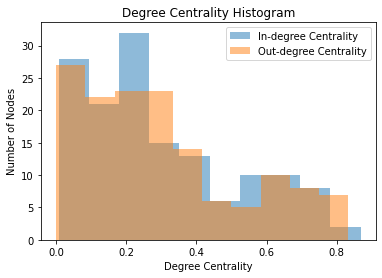

In [15]:
# Degree Centrality Histogram
in_degree_centrality = nx.in_degree_centrality(G)
print(in_degree_centrality)
out_degree_centrality = nx.out_degree_centrality(G)
print(out_degree_centrality)

plt.hist(list(in_degree_centrality.values()), alpha=0.5, label='In-degree Centrality')
plt.hist(list(out_degree_centrality.values()), alpha=0.5, label='Out-degree Centrality')
plt.title('Degree Centrality Histogram')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.legend(loc = 'upper right')
plt.show()

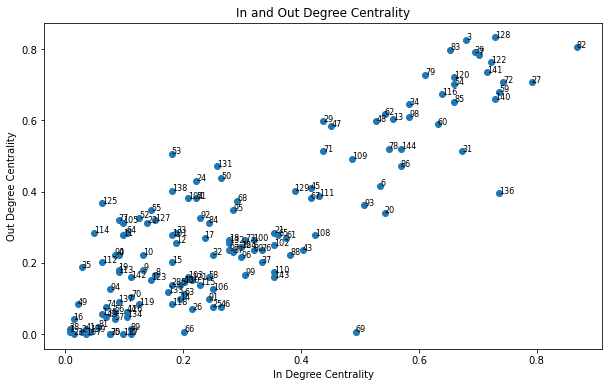

In [16]:
# Degree Centrality Scatter Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(in_degree_centrality.values(), out_degree_centrality.values())
ax.set_xlabel('In Degree Centrality')
ax.set_ylabel('Out Degree Centrality')
ax.set_title('In and Out Degree Centrality')

for node in G.nodes():
    ax.annotate(str(node), xy=(in_degree_centrality[node], out_degree_centrality[node]), fontsize=8)
plt.show()

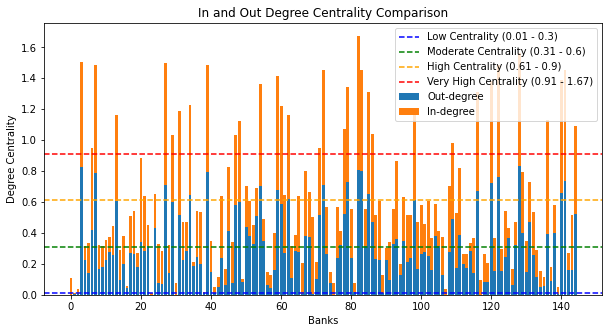

In [17]:
# Centrality Comparison
low = [0.01, 0.30]
moderate = [0.31, 0.60]
high = [0.61, 0.90]
very_high = [0.91, 1.67]
plt.figure(figsize=(10, 5))
plt.bar(out_degree_centrality.keys(), out_degree_centrality.values(), label='Out-degree')
plt.bar(in_degree_centrality.keys(), in_degree_centrality.values(), bottom=list(out_degree_centrality.values()), label='In-degree')
plt.axhline(y=low[0], color='blue', linestyle='--', label=f'Low Centrality ({low[0]} - {low[1]})')
plt.axhline(y=moderate[0], color='green', linestyle='--', label=f'Moderate Centrality ({moderate[0]} - {moderate[1]})')
plt.axhline(y=high[0], color='orange', linestyle='--', label=f'High Centrality ({high[0]} - {high[1]})')
plt.axhline(y=very_high[0], color='red', linestyle='--', label=f'Very High Centrality ({very_high[0]} - {very_high[1]})')
plt.xlabel('Banks')
plt.ylabel('Degree Centrality')
plt.title('In and Out Degree Centrality Comparison')
plt.legend()
plt.show()

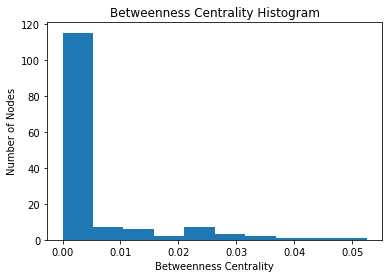

In [18]:
# Betweenness Centrality Histogram
betweenness_centrality = nx.betweenness_centrality(G)
plt.hist(betweenness_centrality.values())
plt.title('Betweenness Centrality Histogram' )
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')
plt.show()

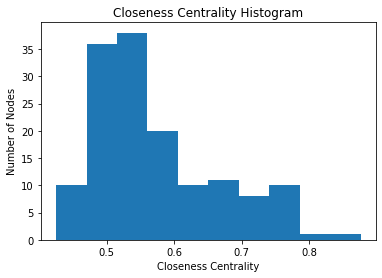

In [19]:
# Closeness Centrality Histogram
closeness_centrality = nx.closeness_centrality(G)
plt.hist(closeness_centrality.values())
plt.title('Closeness Centrality Histogram' )
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')
plt.show()

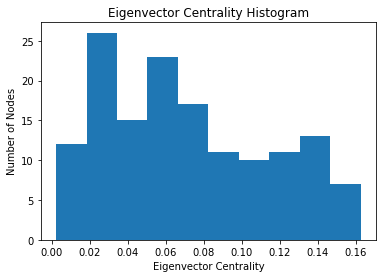

In [20]:
# Eigenvector Centrality Histogram
eigenvector_centrality = nx.eigenvector_centrality(G)
plt.hist(eigenvector_centrality.values())
plt.title('Eigenvector Centrality Histogram')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Number of Nodes')
plt.show()

Clustering

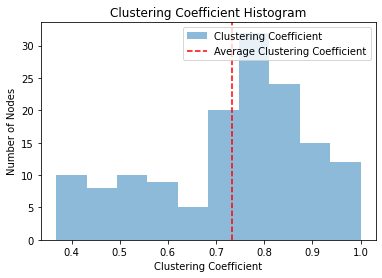

In [21]:
# Clustering Coefficient Histogram
clustering_coefficient = nx.clustering(G)
avg_clustering_coefficient = nx.average_clustering(G)

plt.hist(list(clustering_coefficient.values()), alpha=0.5, label='Clustering Coefficient')
plt.axvline(x=avg_clustering_coefficient, color='r', linestyle='--', label='Average Clustering Coefficient')
plt.title('Clustering Coefficient Histogram')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.legend(loc='upper right')
plt.show()

Assortativity

In [22]:
# Assortativity Coefficient
print('The assortativity coefficient of G =', nx.degree_assortativity_coefficient(G))

The assortativity coefficient of G = -0.3882919829621765


Distribution of Balance Sheets

In [23]:
int_exposures = pd.read_csv('Assignment-data\\interbankExposures.csv', header = None)
bank_asset = pd.read_csv('Assignment-data\\bankAssetWeightedNetwork.csv', header = None)
bank_equities = pd.read_csv('Assignment-data\\bankEquities.csv', header = None).T
bank_num = 145
asset_num = 20
balance_sheet = pd.DataFrame(index = range(bank_num), columns = ['ext_ass', 'int_ass', 'ext_lia', 'int_lia', 'equ', 'dft'])
"""
'ext_ass': External Assets, int
'int_ass': Internal Assets, int
'ext_lia': External Liabilities, int
'int_lia': Internal Liabilities, int
'equ': Equity, int
'dft': Default, bool, start = 0, when failure to perform a task = 1
"""
devalue_func = np.ones(asset_num)
balance_sheet['ext_ass'] = bank_asset @ devalue_func
balance_sheet['equ'] = bank_equities
balance_sheet['int_lia'] = np.sum(int_exposures, axis = 0)
balance_sheet['int_ass'] = np.sum(int_exposures, axis = 1)
balance_sheet['ext_lia'] = balance_sheet['ext_ass'] + balance_sheet['int_ass'] - balance_sheet['int_lia'] - balance_sheet['equ']
balance_sheet['dft'] = 0
print(balance_sheet)

         ext_ass       int_ass       ext_lia      int_lia         equ  dft
0      2154600.0  0.000000e+00  1.150671e+06    538218.69    465710.0    0
1        29473.2  2.302500e+04  4.070980e+04      7351.70      4436.7    0
2       156460.0  2.353800e+04  1.277883e+05     39050.70     13159.0    0
3    343060000.0  1.771697e+08  4.183263e+08  85674483.00  16229000.0    0
4      1846500.0  1.084775e+06  2.032195e+06    460659.54    438420.0    0
..           ...           ...           ...          ...         ...  ...
140  301110000.0  4.305915e+07  2.576143e+08  75172808.00  11382000.0    0
141  286542000.0  1.015331e+08  3.024302e+08  71611906.00  14033000.0    0
142    1215600.0  5.896638e+05  1.372048e+06    303785.69    129430.0    0
143   15375200.0  7.209214e+05  1.138453e+07   3836714.30    874880.0    0
144   84110000.0  2.440614e+07  6.063571e+07  21025428.60  26855000.0    0

[145 rows x 6 columns]


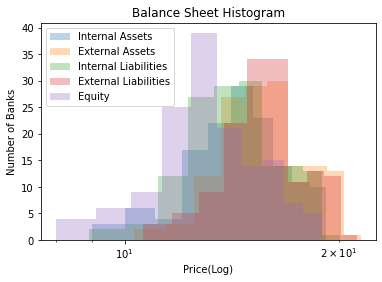

In [24]:
# Balance Sheet Histogram
plt.hist(np.log(balance_sheet['int_ass'][balance_sheet['int_ass'] > 0]), alpha = 0.3, label = 'Internal Assets')
plt.hist(np.log(balance_sheet['ext_ass'][balance_sheet['ext_ass'] > 0]), alpha = 0.3, label = 'External Assets')
plt.hist(np.log(balance_sheet['int_lia'][balance_sheet['int_lia'] > 0]), alpha = 0.3, label = 'Internal Liabilities')
plt.hist(np.log(balance_sheet['ext_lia'][balance_sheet['ext_lia'] > 0]), alpha = 0.3, label = 'External Liabilities')
plt.hist(np.log(balance_sheet['equ'][balance_sheet['equ'] > 0]), alpha = 0.3, label = 'Equity')
plt.title('Balance Sheet Histogram')
plt.xlabel('Price(Log)')
plt.ylabel('Number of Banks')
plt.gca().set_xscale("log")
plt.legend(loc = 'upper left')
plt.show()

In [25]:
# Summary Statistics for Balance Sheet
def print_summary_stats(data, title):
    print(f"\nSummary Statistics for {title}:")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Standard Deviation: {np.std(data):.2f}")
    print(f"Skewness: {skew(data):.2f}")
    print(f"Kurtosis: {kurtosis(data):.2f}")

def summary_stats(data):
    result = pd.DataFrame(columns=['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'])
    result.loc[0] = [np.mean(data), np.median(data), np.std(data), skew(data), kurtosis(data)]
    return result

balance_sheet_stats = pd.DataFrame(columns=['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'])
balance_sheet_stats = pd.concat([balance_sheet_stats, summary_stats(balance_sheet['int_ass'])])
balance_sheet_stats = pd.concat([balance_sheet_stats, summary_stats(balance_sheet['ext_ass'])])
balance_sheet_stats = pd.concat([balance_sheet_stats, summary_stats(balance_sheet['int_lia'])])
balance_sheet_stats = pd.concat([balance_sheet_stats, summary_stats(balance_sheet['ext_lia'])])
balance_sheet_stats = pd.concat([balance_sheet_stats, summary_stats(balance_sheet['equ'])])
balance_sheet_stats.index=['Interbank Asset', 'External Asset', 'Interbank Liabilities', 'External Liabilities', 'Equity']
print(balance_sheet_stats)

                                  Mean      Median Standard Deviation  \
Interbank Asset        16729955.811103   2341851.6    37065062.558287   
External Asset         66997512.973793   7318800.0   201000355.974775   
Interbank Liabilities  16729955.811103   1828090.8    50196967.313346   
External Liabilities   60115606.673793  7602735.32   166311812.535091   
Equity                       6881906.3    515310.0    19752366.345438   

                       Skewness   Kurtosis  
Interbank Asset        3.245159  11.062983  
External Asset          7.68625  72.736605  
Interbank Liabilities  7.687673  72.759012  
External Liabilities   6.400993  53.328788  
Equity                 5.300073  34.106305  


Stress Tests

The bank 82 has the biggest destruction 91
The bank 82 has the slowest default spread speed 5


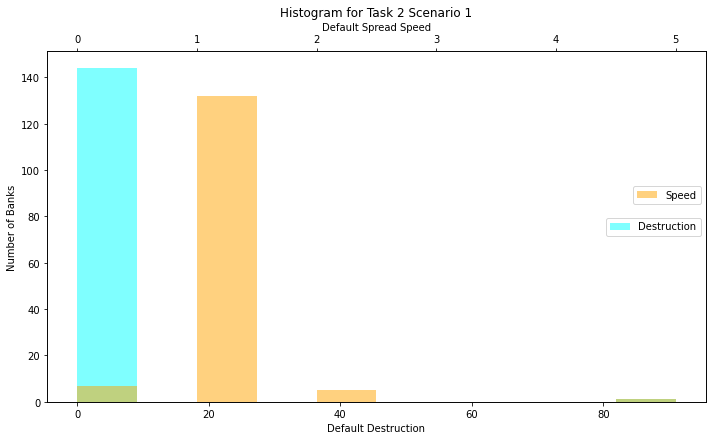

In [26]:
# Task 2
# Scenario 1: One bank default
def one_bank_default(shock_bank = int, 
                     balance_sheet_ = pd.DataFrame):
    balance_sheet = balance_sheet_.copy()
    balance_sheet.loc[shock_bank, 'dft'] = 1
    for t in range(bank_num):
        default_list = balance_sheet['dft'] # record the previous default list
        balance_sheet['int_ass'] = int_exposures @ (1 - default_list)
        balance_sheet['equ'] = balance_sheet['ext_ass'] + balance_sheet['int_ass'] - balance_sheet['int_lia'] - balance_sheet['ext_lia']
        balance_sheet['dft'] = (balance_sheet['equ'] < 0).astype(int)
        if np.sum(default_list) == np.sum(balance_sheet['dft']): # if has new default
            break
    #print('The default lasted', t, 'steps')
    #print('There were', np.sum(balance_sheet['dft']), 'banks who default.')
    #print('The bank who was not default are', [i for i, x in enumerate(balance_sheet['dft']) if x == 0])
    return balance_sheet, t

destruction = np.zeros(bank_num, dtype = int)
speed = np.zeros(bank_num, dtype = int)
for i in range(bank_num):
    destruction[i] = np.sum(one_bank_default(i, balance_sheet)[0]['dft'])
    speed[i] = one_bank_default(i, balance_sheet)[1]
print('The bank', np.argmax(destruction), 'has the biggest destruction', np.max(destruction))
print('The bank', np.argmax(speed), 'has the slowest default spread speed', np.max(speed))


fig, ax1 = plt.subplots(figsize = (10, 6))
ax1.hist(destruction, alpha=0.5, label='Destruction', color = "cyan")
ax1.grid(False)
ax1.set_xlabel('Default Destruction')
ax1.set_ylabel('Number of Banks')
ax1.legend(loc = "center right")

ax2 = ax1.twiny()
ax2.hist(speed, alpha=0.5, label='Speed', color = 'orange')
ax2.grid(False)
ax2.set_xlabel('Default Spread Speed')
ax2.legend(bbox_to_anchor=(1, 0.59), loc = "center right")

fig.tight_layout()
plt.title('Histogram for Task 2 Scenario 1')
plt.show()



The bank 8 has the biggest destruction 126
The bank 19 has the slowest default spread speed 8


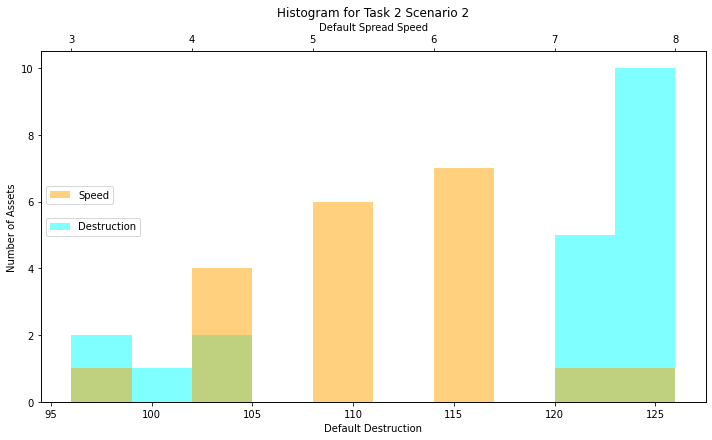

In [27]:
# Task 2
# Scenario 2: External assets devalued
def external_devalue(shock_asset = int, 
                     balance_sheet_ = pd.DataFrame, 
                     bank_asset_ = pd.DataFrame):
    balance_sheet = balance_sheet_.copy()
    bank_asset = bank_asset_.copy()
    asset_num = bank_asset.shape[1]
    devalue_func = np.ones(asset_num)
    devalue_func[shock_asset] = 0
    for t in range(bank_num):
        default_list = balance_sheet['dft'] # record the previous default list
        balance_sheet['int_ass'] = int_exposures @ (1 - default_list)
        balance_sheet['equ'] = bank_asset @ devalue_func + balance_sheet['int_ass'] - balance_sheet['int_lia'] - balance_sheet['ext_lia']
        balance_sheet['dft'] = (balance_sheet['equ'] < 0).astype(int)
        if np.sum(default_list) == np.sum(balance_sheet['dft']): # if has new default
            break
    #print('The default lasted', t, 'steps')
    #print('There were', np.sum(balance_sheet['dft']), 'banks who default.')
    #print('The bank who was not default are', [i for i, x in enumerate(balance_sheet['dft']) if x == 0])
    return balance_sheet, t

destruction = np.zeros(asset_num, dtype = int)
speed = np.zeros(asset_num, dtype = int)
for i in range(asset_num):
    destruction[i] = np.sum(external_devalue(i, balance_sheet, bank_asset)[0]['dft'])
    speed[i] = external_devalue(i, balance_sheet, bank_asset)[1]

print('The bank', np.argmax(destruction), 'has the biggest destruction', np.max(destruction))
print('The bank', np.argmax(speed), 'has the slowest default spread speed', np.max(speed))

fig, ax1 = plt.subplots(figsize = (10, 6))
ax1.hist(destruction, alpha=0.5, label='Destruction', color = "cyan")
ax1.grid(False)
ax1.set_xlabel('Default Destruction')
ax1.set_ylabel('Number of Assets')
ax1.legend(loc = "center left")

ax2 = ax1.twiny()
ax2.hist(speed, alpha=0.5, label='Speed', color = 'orange')
ax2.grid(False)
ax2.set_xlabel('Default Spread Speed')
ax2.legend(bbox_to_anchor=(0, 0.59), loc = "center left")

fig.tight_layout()
plt.title('Histogram for Task 2 Scenario 2')
plt.show()


The bank 0 has the biggest destruction 127
The bank 0 has the slowest default spread speed 144


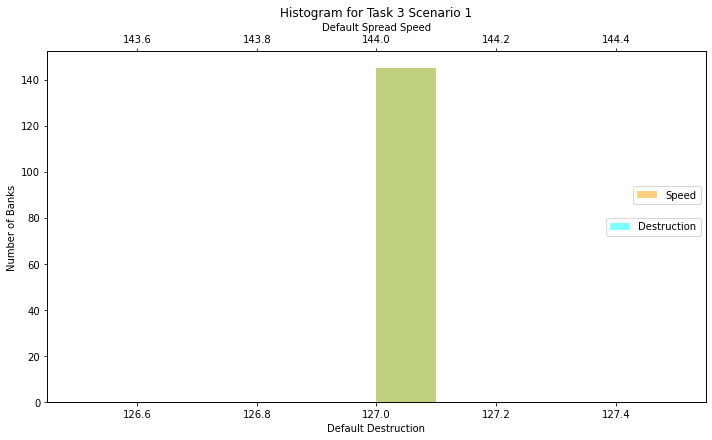

In [28]:
# Task 3
# Scenario 1: One bank default + Linear devaluation of asset by fire-sale
def one_bank_default_linear_devaluation(
        shock_bank = int, 
        balance_sheet_ = pd.DataFrame,
        bank_asset_ = pd.DataFrame, 
        a = float):
    balance_sheet = balance_sheet_.copy()
    bank_asset = bank_asset_.copy()
    balance_sheet.loc[shock_bank, 'dft'] = 1
    bank_num = balance_sheet.shape[0]
    for t in range(bank_num):
        q = ((np.ones(bank_num) - balance_sheet['dft']) @ bank_asset) / ((np.ones(bank_num)) @ bank_asset)
        p = 1 - a * q# linear devaluation
        default_list = balance_sheet['dft'] # record the previous default list
        balance_sheet['int_ass'] = int_exposures @ (1 - default_list)
        balance_sheet['equ'] = bank_asset @ p + balance_sheet['int_ass'] - balance_sheet['int_lia'] - balance_sheet['ext_lia']
        balance_sheet['dft'] = (balance_sheet['equ'] < 0).astype(int)
        if np.sum(default_list) == np.sum(balance_sheet['dft']): # if has new default
            break
    #print('The default lasted', t, 'steps')
    #print('There were', np.sum(balance_sheet['dft']), 'banks who default.')
    #print('The bank who was not default are', [i for i, x in enumerate(balance_sheet['dft']) if x == 0])
    return balance_sheet, t

destruction = np.zeros(bank_num, dtype = int)
speed = np.zeros(bank_num, dtype = int)
a = 0.3
for i in range(bank_num):
    destruction[i] = np.sum(one_bank_default_linear_devaluation(i, balance_sheet, bank_asset, a)[0]['dft'])
    speed[i] = one_bank_default_linear_devaluation(i, balance_sheet, bank_asset, a)[1]
print('The bank', np.argmax(destruction), 'has the biggest destruction', np.max(destruction))
print('The bank', np.argmax(speed), 'has the slowest default spread speed', np.max(speed))


fig, ax1 = plt.subplots(figsize = (10, 6))
ax1.hist(destruction, alpha=0.5, label='Destruction', color = "cyan")
ax1.grid(False)
ax1.set_xlabel('Default Destruction')
ax1.set_ylabel('Number of Banks')
ax1.legend(loc = "center right")

ax2 = ax1.twiny()
ax2.hist(speed, alpha=0.5, label='Speed', color = 'orange')
ax2.grid(False)
ax2.set_xlabel('Default Spread Speed')
ax2.legend(bbox_to_anchor=(1, 0.59), loc = "center right")

fig.tight_layout()
plt.title('Histogram for Task 3 Scenario 1')
plt.show()


The bank 18 has the biggest destruction 134
The bank 0 has the slowest default spread speed 144


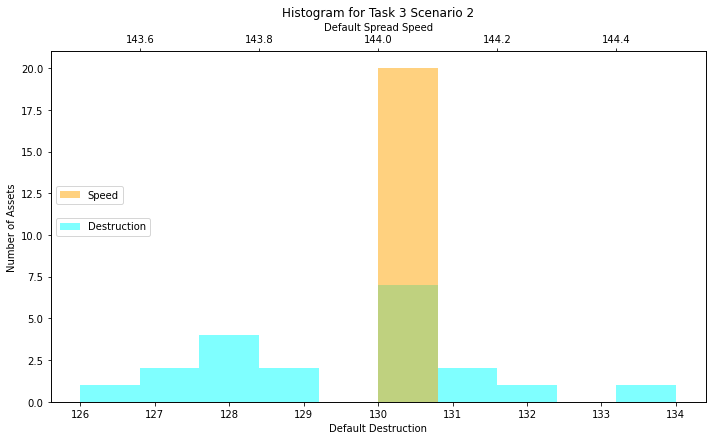

In [29]:
# Task 3
# Scenario 2: External assets devalued + Linear devaluation of asset by fire-sale
def external_devalued_linear_devaluation(
        shock_asset = int, 
        balance_sheet_ = pd.DataFrame,
        bank_asset_ = pd.DataFrame, 
        a = float):
    balance_sheet = balance_sheet_.copy()
    bank_asset = bank_asset_.copy()
    asset_num = bank_asset.shape[1]
    devalue_func = np.ones(asset_num)
    devalue_func[shock_asset] = 0
    l = balance_sheet.shape[0]
    for t in range(bank_num):
        q = ((np.ones(l) - balance_sheet['dft']) @ bank_asset) / ((np.ones(l)) @ bank_asset)
        p = (1 - a * q) * devalue_func# linear devaluation
        default_list = balance_sheet['dft'] # record the previous default list
        balance_sheet['int_ass'] = int_exposures @ (1 - default_list)
        balance_sheet['equ'] = bank_asset @ p + balance_sheet['int_ass'] - balance_sheet['int_lia'] - balance_sheet['ext_lia']
        balance_sheet['dft'] = (balance_sheet['equ'] < 0).astype(int)
        if np.sum(default_list) == np.sum(balance_sheet['dft']): # if has new default
            break
    #print('The default lasted', t, 'steps')
    #print('There were', np.sum(balance_sheet['dft']), 'banks who default.')
    #print('The bank who was not default are', [i for i, x in enumerate(balance_sheet['dft']) if x == 0])
    return balance_sheet, t

destruction = np.zeros(asset_num, dtype = int)
speed = np.zeros(asset_num, dtype = int)
a = 0.3
for i in range(asset_num):
    destruction[i] = np.sum(external_devalued_linear_devaluation(i, balance_sheet, bank_asset, a)[0]['dft'])
    speed[i] = external_devalued_linear_devaluation(i, balance_sheet, bank_asset, a)[1]

print('The bank', np.argmax(destruction), 'has the biggest destruction', np.max(destruction))
print('The bank', np.argmax(speed), 'has the slowest default spread speed', np.max(speed))

fig, ax1 = plt.subplots(figsize = (10, 6))
ax1.hist(destruction, alpha=0.5, label='Destruction', color = "cyan")
ax1.grid(False)
ax1.set_xlabel('Default Destruction')
ax1.set_ylabel('Number of Assets')
ax1.legend(loc = "center left")

ax2 = ax1.twiny()
ax2.hist(speed, alpha=0.5, label='Speed', color = 'orange')
ax2.grid(False)
ax2.set_xlabel('Default Spread Speed')
ax2.legend(bbox_to_anchor=(0, 0.59), loc = "center left")

fig.tight_layout()
plt.title('Histogram for Task 3 Scenario 2')
plt.show()
